In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [2]:
dF=pd.read_csv('Raisin_Dataset.csv')
dF

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS.

A total of 900 raisin grains were used, including 450 pieces from both varieties.

These images were subjected to various stages of pre-processing and 7 morphological features were extracted.

These features have been classified using three different artificial intelligence techniques.




Attribute Information:

1.) Area: Gives the number of pixels within the boundaries of the raisin.

2.) Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.

3.) MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.

4.) MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.

5.) Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.

6.) ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.

7.) Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.

8.) Class: Kecimen and Besni raisin.



In [3]:
#Exploring the Details of the dataset
dF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [4]:
#Returning All the keys from the dataset
dF.keys()

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

Text(0.5, 1.0, 'Number of raisins from different varieties')

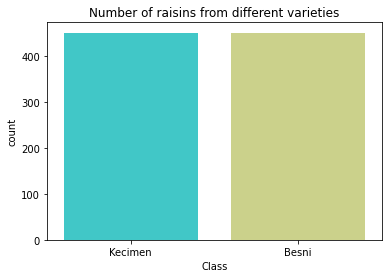

In [5]:
#Showing the number of rasisns from different varieties on a plot
sns.countplot(x='Class',data=dF, palette='rainbow')
plt.title('Number of raisins from different varieties')

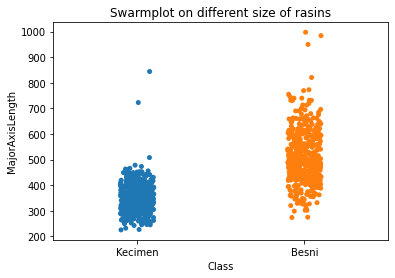

In [6]:
#Plotting the Data for largest rasins
sns.stripplot(x='Class', y='MajorAxisLength', data=dF)
plt.title("Swarmplot on different size of rasins");

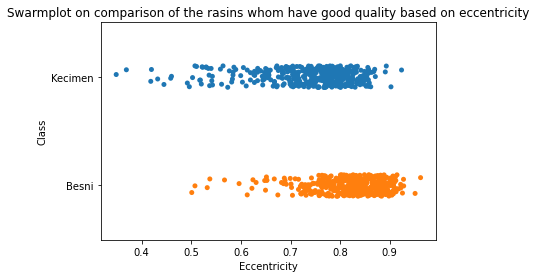

In [7]:
#Plotting Data to compare the rasin whom have good quality
sns.stripplot(x='Eccentricity', y='Class', data=dF)
plt.title("Swarmplot on comparison of the rasins whom have good quality based on eccentricity");

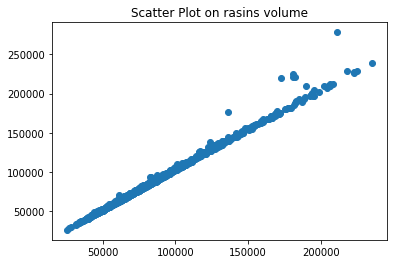

In [8]:
#Plotting Data to compare the area and convex area of rasins
plt.scatter(dF['Area'],dF['ConvexArea'])
plt.title("Scatter Plot on rasins volume");

Outcomes from the plotting.

There was actually not that much idea generated from watching the plotting. There was no pattern
to identify something.


In [9]:
#Counting the number of target variable
dF.groupby('Class').size()

Class
Besni      450
Kecimen    450
dtype: int64

In [11]:
#Creating the Correlation Matrix For the Whole Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
labelencoder=LabelEncoder() #it is used to convert the categorical data into machine readable form
for column in dF.columns:
    dF[Class] = labelencoder.fit_transform(dF[Class])
plt.figure(figsize=(14,12))
sns.heatmap(dF.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

NameError: name 'Class' is not defined

In [ ]:
# corr() to calculate the correlation between variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz

correlation_matrix = dF.corr().round(2)
# changing the figure size
plt.figure(figsize = (14, 12))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
#creating the updated feature matrix using the important columns
up_df=dF[['Area','MajorAxisLength','MinorAxisLength','ConvexArea','Perimeter']]
up_df

In [ ]:
#seperating the target variable
y=dF['Class']
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(up_df, y, test_size = 0.3,random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

Training: 630 out of 900 data has been chosen for training the model.

Testing: 270 out of 900 data has been chosen for testing the model.

This is a supervised machine learning model.

Because this is a labeled dataset and I know what type of data I am working with. Total 2 types of algorithms have been used to test the accuracy of this model.
They are listed below:

1.Support Vector Machine algorithm

2.Decision Tree algorithm

Checking the Accuracy of the model based on Different ML Algorithms


In [ ]:
# importing the necessary package to use the svm algorithm
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
y_prediction_svm = model_svm.predict(X_test)
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print('The accuracy of the model based on Support Vector Machine Algorithm is {}%'.format(score_svm*100))
perc.append(score_svm)

In [ ]:
# importing the necessary package to use the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train)
y_prediction_dt = model_dt.predict(X_test)
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print('The accuracy of the model based on Decision Tree Algorithm is {}%'.format(score_dt*100))
perc.append(score_dt)

Model Accuracy:

This model has an accuracy of 83.7% based on Support Vector Machine algorithm.